<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/07-Machine%20Learning/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [17]:
startup_df=pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv')

In [18]:
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
shape=startup_df.shape
print("Dataset contains {} rows and {} columns".format(shape[0],shape[1]))

Dataset contains 50 rows and 5 columns


In [20]:
startup_df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [21]:
#Statistical Details of the dataset
startup_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [22]:
x=startup_df.iloc[:,:4]
y=startup_df.iloc[:,4]

In [10]:
# ohe=OneHotEncoder(sparse=False)
# x=ohe.fit_transform(startup_df[['State']])

In [11]:
#ohe.categories_

[array(['California', 'Florida', 'New York'], dtype=object)]

In [23]:
col_trans=make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),['State']),
    remainder='passthrough')

In [24]:
x=col_trans.fit_transform(x)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (40, 6)
X_test: (10, 6)
Y_train: (40,)
Y_test: (10,)


In [31]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=linreg.predict(x_test)
y_pred

array([103015.20159795, 132582.27760816, 132447.73845175,  71976.09851258,
       178537.48221057, 116161.24230167,  67851.69209676,  98791.73374687,
       113969.43533014, 167921.06569552])

In [36]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 93.47


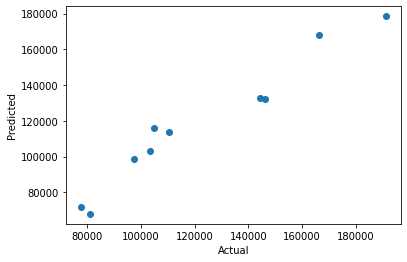

In [37]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

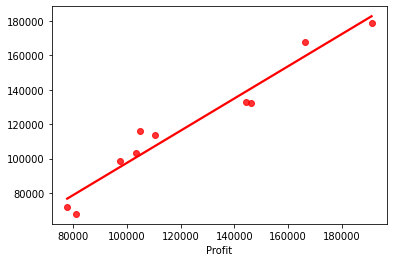

In [40]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [41]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [42]:
pred_df

,Actual Value,Predicted Value,Difference
28,103282.38,103015.201598,267.178402
11,144259.40,132582.277608,11677.122392
10,146121.95,132447.738452,13674.211548
41,77798.83,71976.098513,5822.731487
2,191050.39,178537.482211,12512.907789
27,105008.31,116161.242302,-11152.932302
38,81229.06,67851.692097,13377.367903
31,97483.56,98791.733747,-1308.173747
22,110352.25,113969.435330,-3617.185330
4,166187.94,167921.065696,-1733.125696
